In [5]:
import os
print(os.getcwd())


C:\Users\powerX


In [6]:
file_path = r"C:\Users\powerX\Customer_Churn_Prediction\WA_Fn-UseC_-Telco-Customer-Churn.csv"
data = pd.read_csv(file_path)
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Display basic info about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())


Missing values in each column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [9]:
# Display basic statistics of numerical columns
data.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
# Fill missing values with mode for categorical and median for numerical columns
for col in data.columns:
    if data[col].dtype == 'object':  # Categorical columns
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:  # Numerical columns
        data[col].fillna(data[col].median(), inplace=True)

# Verify if missing values are handled
print("Missing values after handling:")
print(data.isnull().sum())


Missing values after handling:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [11]:
# Drop CustomerID and any redundant columns
data.drop(['customerID'], axis=1, inplace=True)
print("Columns after removal:", data.columns)


Columns after removal: Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [12]:
# Convert categorical variables into numerical values using One-Hot Encoding
data = pd.get_dummies(data, drop_first=True)
print("Dataset after encoding:")
print(data.head())


Dataset after encoding:
   SeniorCitizen  tenure  MonthlyCharges  gender_Male  Partner_Yes  \
0              0       1           29.85        False         True   
1              0      34           56.95         True        False   
2              0       2           53.85         True        False   
3              0      45           42.30         True        False   
4              0       2           70.70        False        False   

   Dependents_Yes  PhoneService_Yes  MultipleLines_No phone service  \
0           False             False                            True   
1           False              True                           False   
2           False              True                           False   
3           False             False                            True   
4           False              True                           False   

   MultipleLines_Yes  InternetService_Fiber optic  ...  TotalCharges_996.45  \
0              False                        False

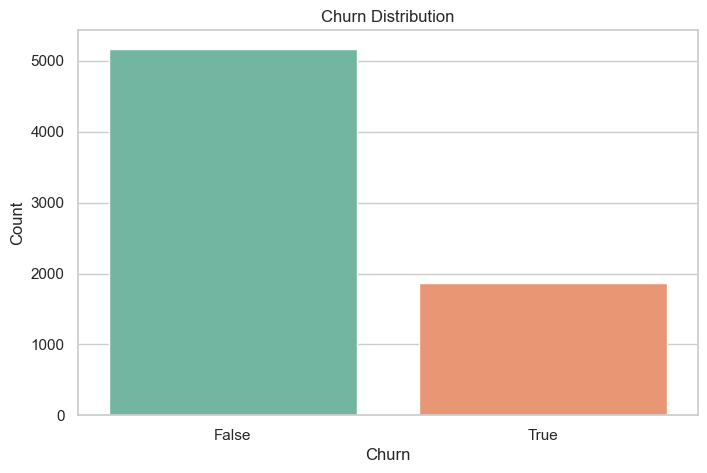

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the churn distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn_Yes', data=data, palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


In [16]:
# Combine all incorrectly expanded TotalCharges columns into a single column
total_charges_columns = [col for col in data.columns if col.startswith('TotalCharges_')]
data['TotalCharges'] = data[total_charges_columns].sum(axis=1)

# Drop the unnecessary split columns
data.drop(total_charges_columns, axis=1, inplace=True)

# Confirm the change
data.head()


,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,TotalCharges
0,0,1,29.85,False,True,False,False,True,False,False,...,False,False,False,False,True,False,True,False,False,1
1,0,34,56.95,True,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,1
2,0,2,53.85,True,False,False,True,False,False,False,...,False,False,False,False,True,False,False,True,True,1
3,0,45,42.30,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,1
4,0,2,70.70,False,False,False,True,False,False,True,...,False,False,False,False,True,False,True,False,True,1


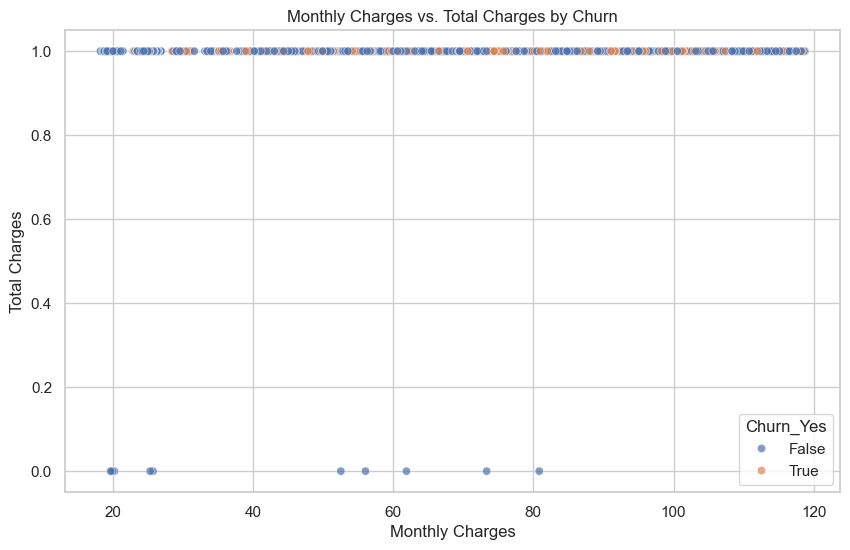

In [17]:
# Scatter plot of Monthly Charges vs. Total Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn_Yes', data=data, alpha=0.7)
plt.title('Monthly Charges vs. Total Charges by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()


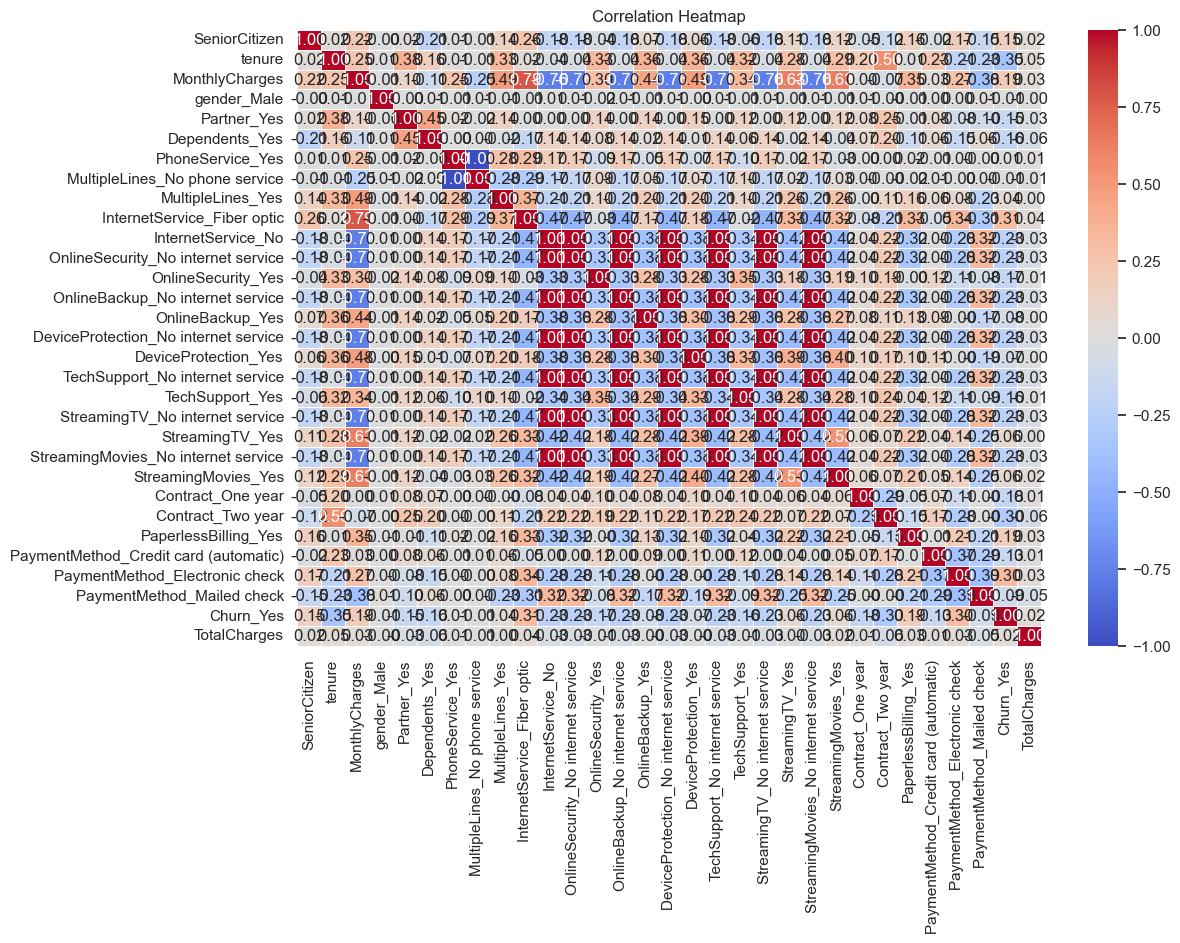

In [18]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


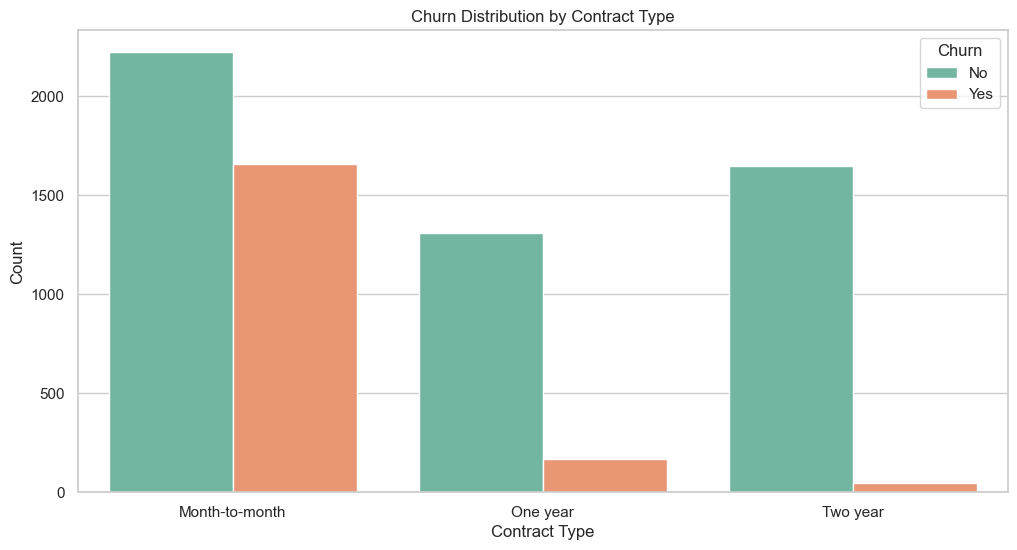

In [23]:
# Distribution of Churn by Contract Type
plt.figure(figsize=(12, 6))

# Creating a new column to categorize contract types
contract_labels = []
for index, row in data.iterrows():
    if row['Contract_One year'] == 1:
        contract_labels.append('One year')
    elif row['Contract_Two year'] == 1:
        contract_labels.append('Two year')
    else:
        contract_labels.append('Month-to-month')

data['Contract_Type'] = contract_labels

# Plot
sns.countplot(x='Contract_Type', hue='Churn_Yes', data=data, palette='Set2')
plt.title('Churn Distribution by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


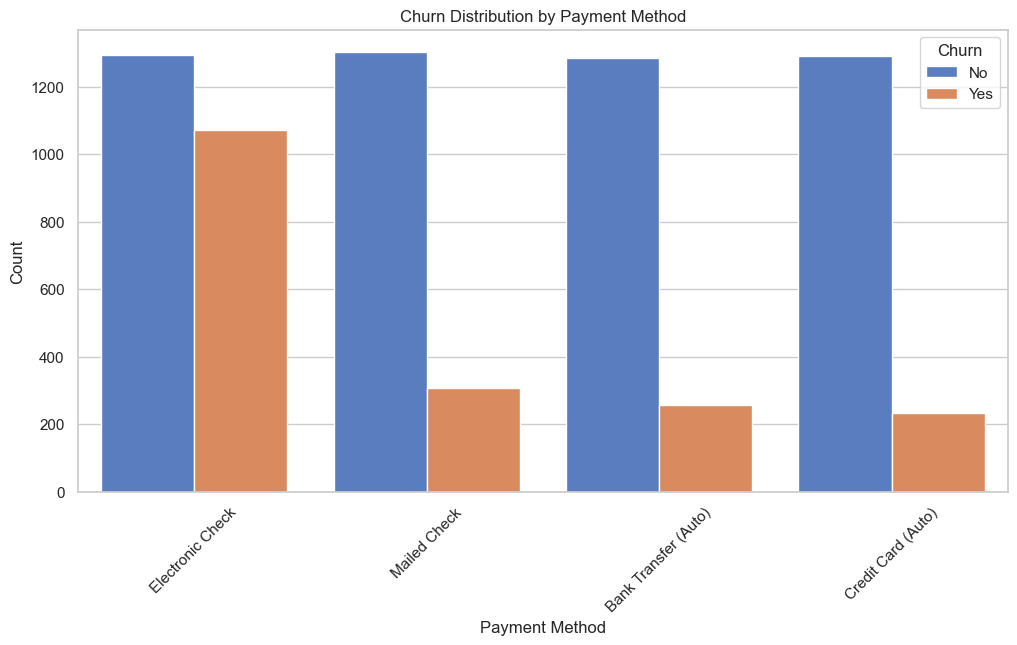

In [24]:
# Distribution of Churn by Payment Method
plt.figure(figsize=(12, 6))

# Creating a new column to categorize payment methods
payment_labels = []
for index, row in data.iterrows():
    if row['PaymentMethod_Credit card (automatic)'] == 1:
        payment_labels.append('Credit Card (Auto)')
    elif row['PaymentMethod_Electronic check'] == 1:
        payment_labels.append('Electronic Check')
    elif row['PaymentMethod_Mailed check'] == 1:
        payment_labels.append('Mailed Check')
    else:
        payment_labels.append('Bank Transfer (Auto)')

data['PaymentMethod_Type'] = payment_labels

# Plotting
sns.countplot(x='PaymentMethod_Type', hue='Churn_Yes', data=data, palette='muted')
plt.title('Churn Distribution by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()


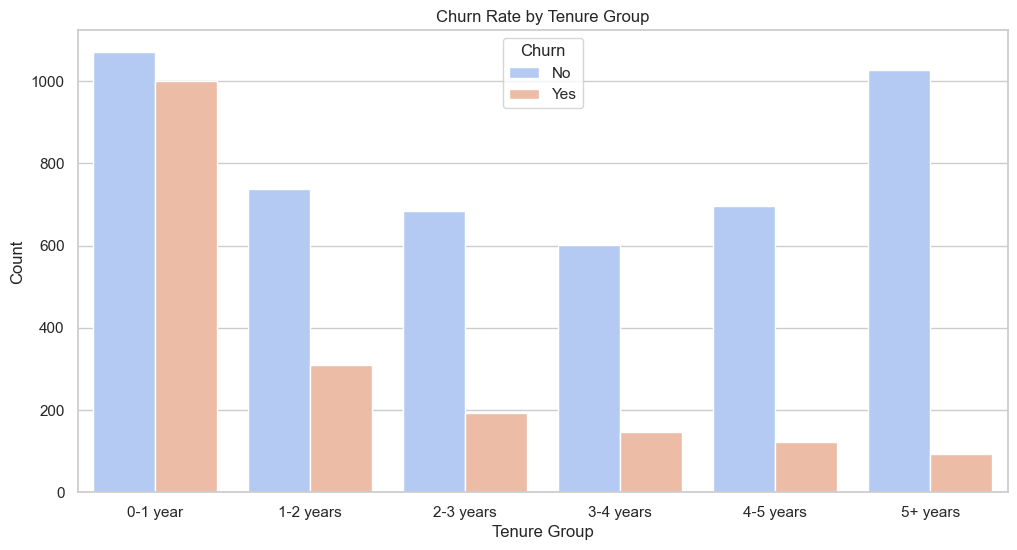

In [25]:
# Create tenure groups
bins = [0, 12, 24, 36, 48, 60, 72]  # Groups by years
labels = ['0-1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5+ years']
data['TenureGroup'] = pd.cut(data['tenure'], bins=bins, labels=labels, right=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(x='TenureGroup', hue='Churn_Yes', data=data, palette='coolwarm')
plt.title('Churn Rate by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


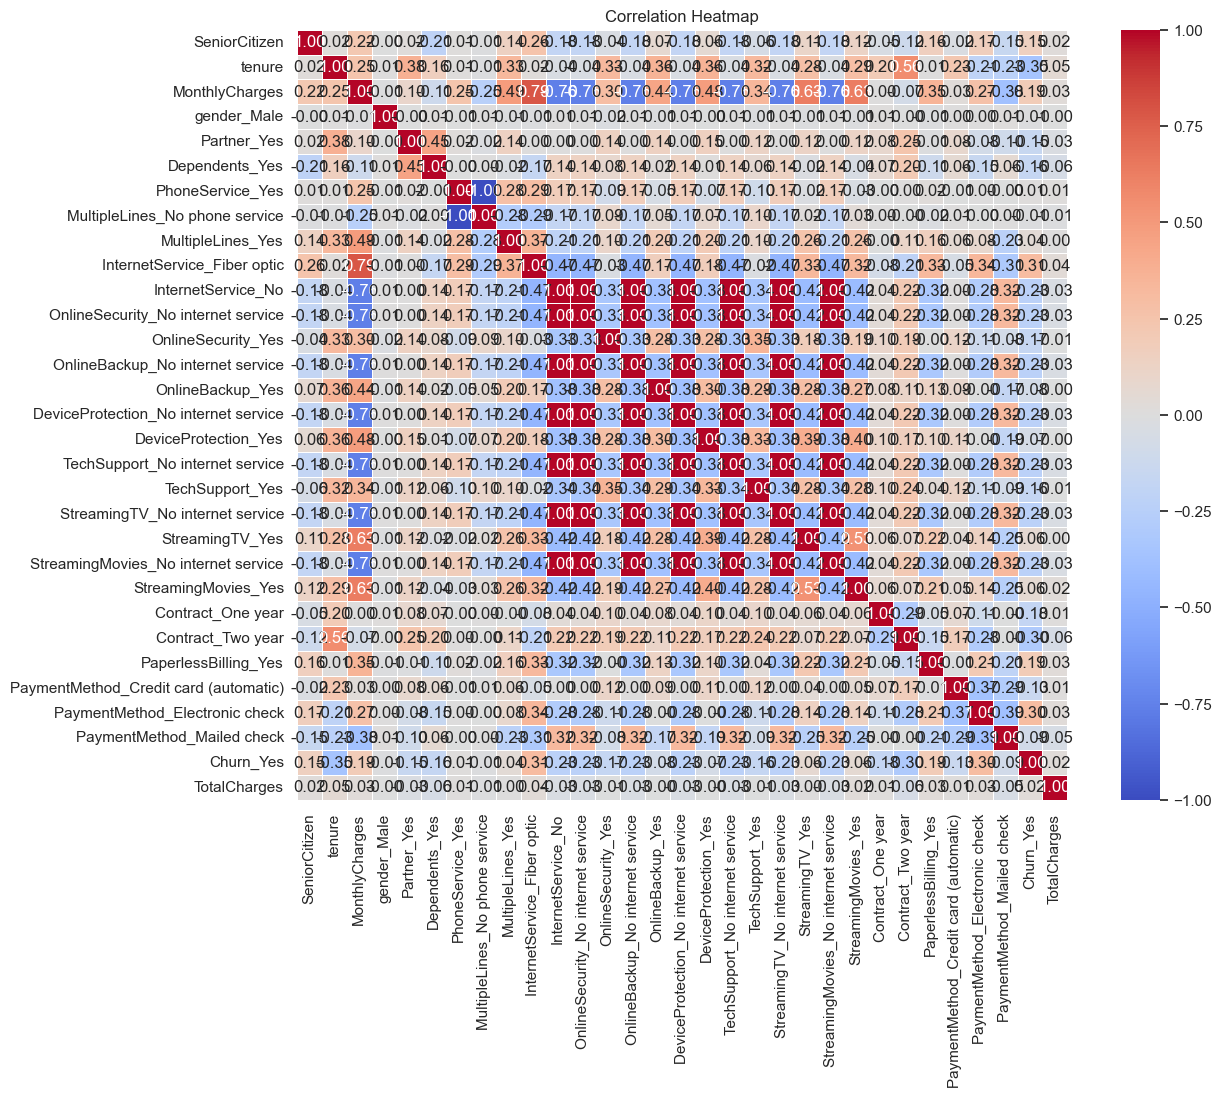

In [26]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
corr = data.corr(numeric_only=True)  # Calculate correlation matrix
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Correlation Heatmap')
plt.show()


In [28]:
# Ensure all features are numeric
# Convert any remaining non-numeric columns into numeric format
X = pd.get_dummies(data.drop('Churn_Yes', axis=1), drop_first=True)
y = data['Churn_Yes']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


Accuracy: 0.81

Confusion Matrix:
 [[938  98]
 [167 206]]

Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.91      0.88      1036
        True       0.68      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409



In [29]:
# Coefficients of the logistic regression model
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Display the top positive and negative coefficients
print("\nTop Positive Coefficients (Increase Churn):\n")
print(coefficients.head(10))

print("\nTop Negative Coefficients (Decrease Churn):\n")
print(coefficients.tail(10))



Top Positive Coefficients (Increase Churn):

                        Feature  Coefficient
39         TenureGroup_5+ years     1.204820
9   InternetService_Fiber optic     1.149459
38        TenureGroup_4-5 years     1.077896
37        TenureGroup_3-4 years     0.591806
29                 TotalCharges     0.551211
22          StreamingMovies_Yes     0.446899
8             MultipleLines_Yes     0.382969
20              StreamingTV_Yes     0.351019
25         PaperlessBilling_Yes     0.335269
0                 SeniorCitizen     0.183786

Top Negative Coefficients (Decrease Churn):

                                 Feature  Coefficient
15  DeviceProtection_No internet service    -0.147122
5                         Dependents_Yes    -0.147355
6                       PhoneService_Yes    -0.229480
18                       TechSupport_Yes    -0.244918
35                 TenureGroup_1-2 years    -0.294427
12                    OnlineSecurity_Yes    -0.333444
23                     Contract_One

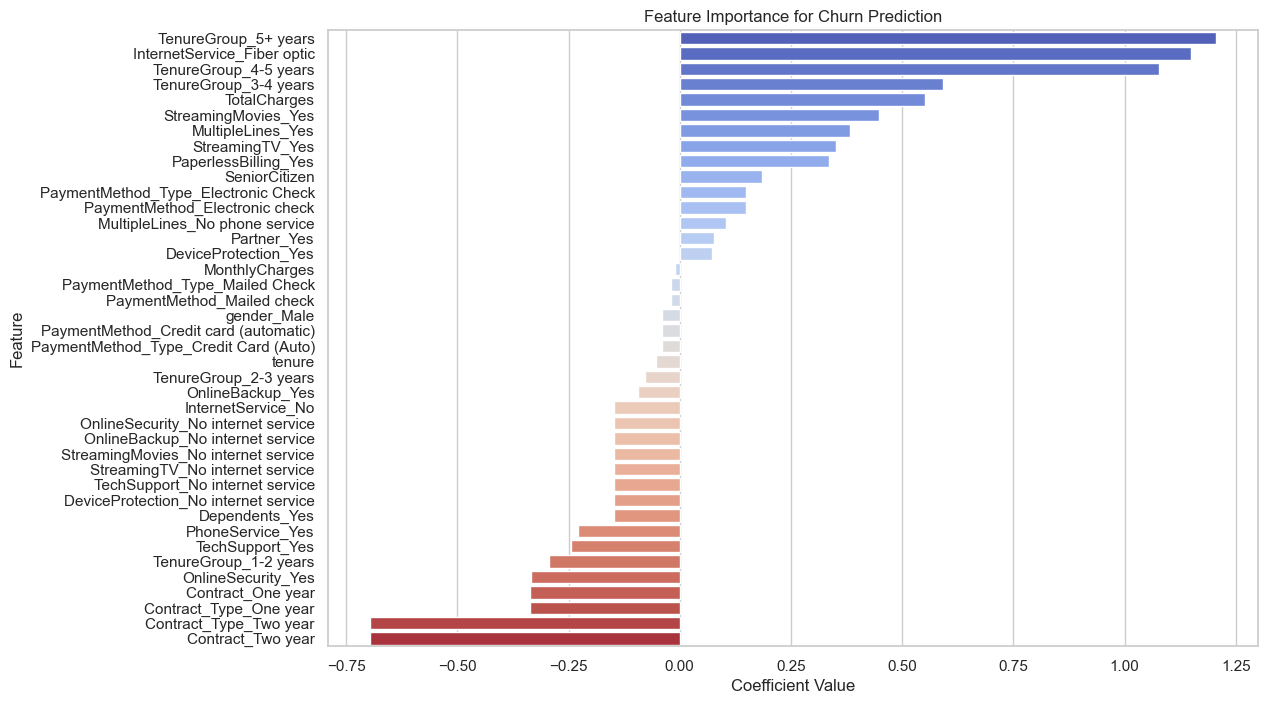

In [30]:
# Visualization of feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='coolwarm')
plt.title('Feature Importance for Churn Prediction')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


In [31]:
from sklearn.model_selection import cross_val_score

# Cross-validation with 5 folds
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


Cross-Validation Accuracy Scores: [0.80482612 0.80624556 0.79063165 0.81676136 0.80539773]
Mean Accuracy: 0.8048
Standard Deviation: 0.0083


In [33]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],        # Regularization strength
    'max_iter': [100, 500, 1000, 2000]    # Maximum iterations
}

# Perform Grid Search
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

# Display the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'C': 1, 'max_iter': 100}
Best Accuracy: 0.8064765267114007


In [34]:
# Split the data into training and testing sets again
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Retrain the model with the best parameters
final_model = LogisticRegression(C=1, max_iter=100)
final_model.fit(X_train, y_train)

# Make predictions
y_pred = final_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Print the evaluation metrics
print("Final Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Final Model Accuracy: 0.807382867960246

Confusion Matrix:
 [[1402  137]
 [ 270  304]]

Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.91      0.87      1539
        True       0.69      0.53      0.60       574

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113



In [35]:
import joblib

# Save the model
joblib.dump(final_model, "churn_prediction_model.pkl")

print("Model saved successfully!")


Model saved successfully!


In [36]:
import joblib

# Save the final model
joblib.dump(final_model, "churn_prediction_model.pkl")

print("Model saved successfully as 'churn_prediction_model.pkl'!")


Model saved successfully as 'churn_prediction_model.pkl'!


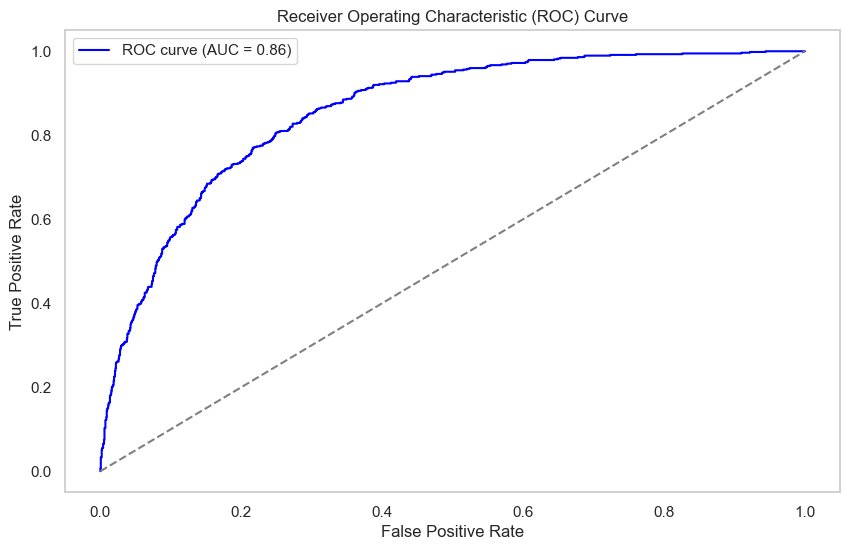

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities
y_prob = final_model.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()


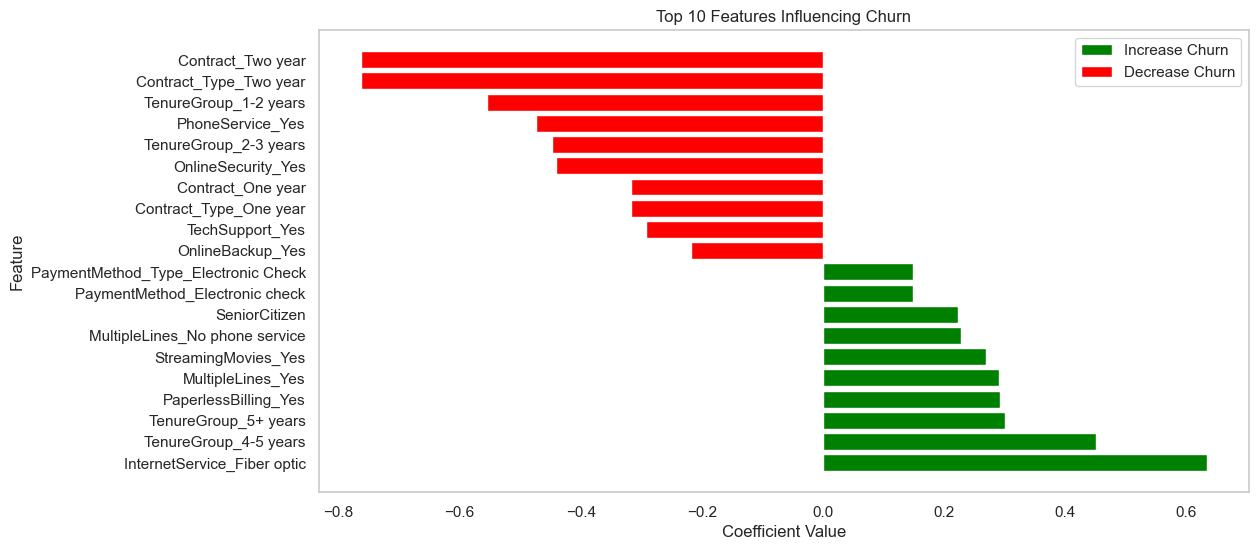

In [38]:
# Extracting feature importance (coefficients)
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': final_model.coef_.flatten()
}).sort_values(by='Coefficient', ascending=False)

# Plotting the top positive and negative coefficients
plt.figure(figsize=(12, 6))
plt.barh(coefficients['Feature'][:10], coefficients['Coefficient'][:10], color='green', label='Increase Churn')
plt.barh(coefficients['Feature'][-10:], coefficients['Coefficient'][-10:], color='red', label='Decrease Churn')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Features Influencing Churn')
plt.legend()
plt.grid()
plt.show()


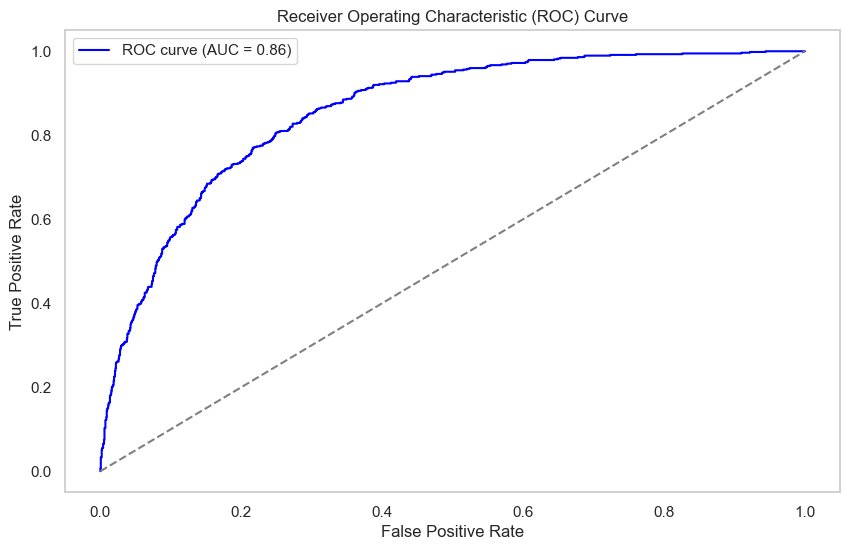

ROC Curve saved as 'roc_curve.png'


In [39]:
# Export ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.savefig('roc_curve.png')  # Save as PNG
plt.show()
print("ROC Curve saved as 'roc_curve.png'")


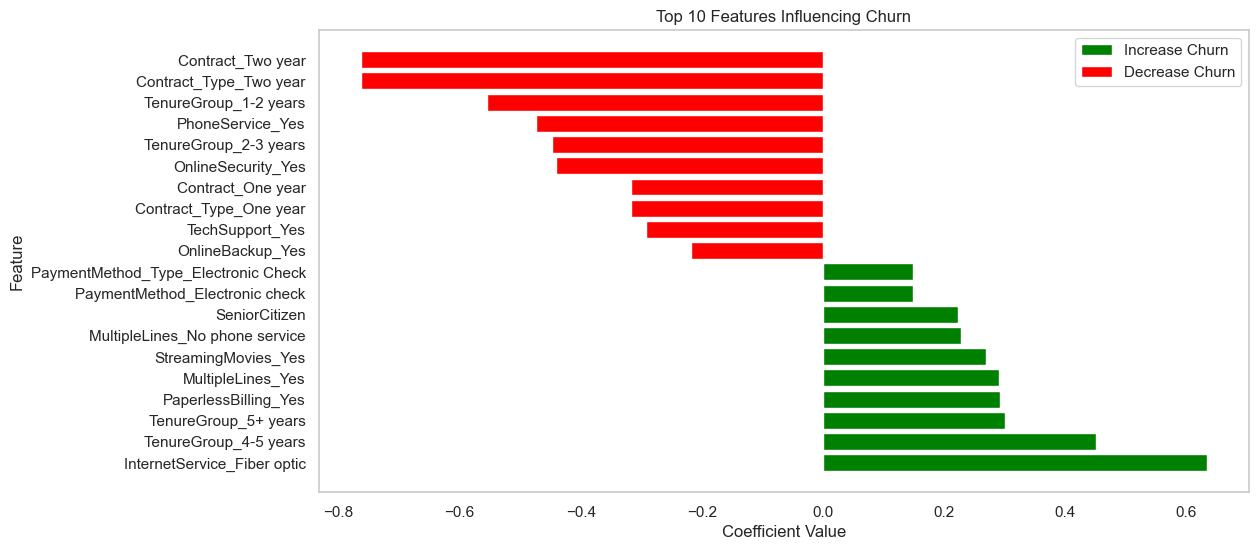

Feature Importance saved as 'feature_importance.png'


In [40]:
# Export Feature Importance
plt.figure(figsize=(12, 6))
plt.barh(coefficients['Feature'][:10], coefficients['Coefficient'][:10], color='green', label='Increase Churn')
plt.barh(coefficients['Feature'][-10:], coefficients['Coefficient'][-10:], color='red', label='Decrease Churn')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Features Influencing Churn')
plt.legend()
plt.grid()
plt.savefig('feature_importance.png')  # Save as PNG
plt.show()
print("Feature Importance saved as 'feature_importance.png'")


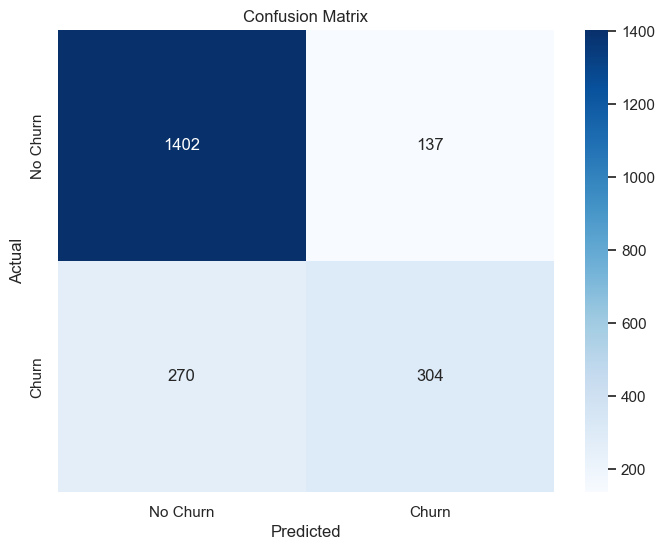

Confusion Matrix saved as 'confusion_matrix.png'


In [42]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot and export confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')  # Save as PNG
plt.show()
print("Confusion Matrix saved as 'confusion_matrix.png'")


In [43]:
pwd


'C:\\Users\\powerX'